In [3]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import SGD
from IPython.display import HTML, display, clear_output, SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Define the ResNet architecture
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

In [6]:
def residual_block(x, filters, strides=(1, 1)):
    shortcut = x
    x = Conv2D(filters, (3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    if strides != (1, 1):
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Activation('relu')(x + shortcut)
    return x

In [7]:
x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 128, strides=(2, 2))
x = residual_block(x, 128)
x = residual_block(x, 256, strides=(2, 2))
x = residual_block(x, 256)
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

In [8]:
# Compile the model
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# model.summary()

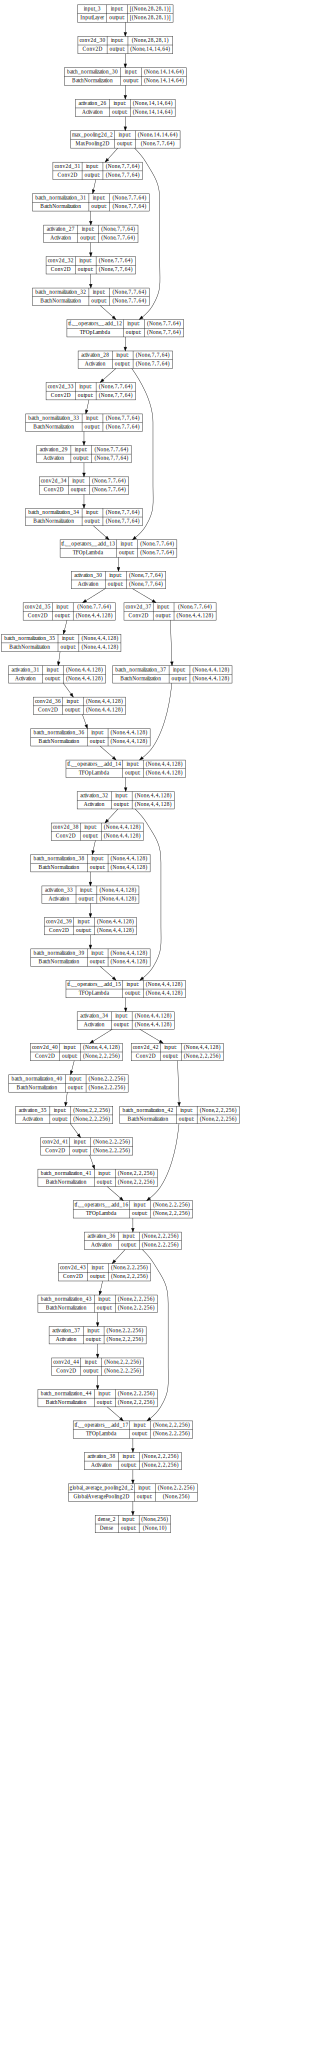

In [9]:
# lets look at the summary
plot_model(model, to_file='model.png')
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 9s 14ms/step - loss: 0.1452 - accuracy: 0.9568 - val_loss: 0.1185 - val_accuracy: 0.9614
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0355 - val_accuracy: 0.9891
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0247 - val_accuracy: 0.9916
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0351 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0266 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0231 - val_accuracy: 0.9928

In [11]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02462017722427845
Test accuracy: 0.9932000041007996


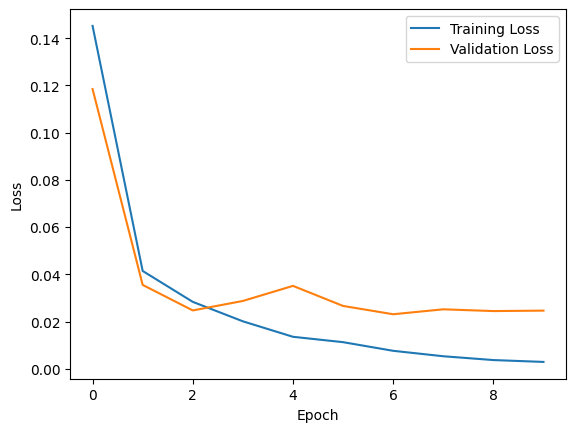

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import SGD
from IPython.display import HTML, display, clear_output, SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the ResNet architecture
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

def residual_block(x, filters, strides=(1, 1)):
    shortcut = x
    x = Conv2D(filters, (3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    if strides != (1, 1):
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Activation('relu')(x + shortcut)
    return x

x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 128, strides=(2, 2))
x = residual_block(x, 128)
x = residual_block(x, 256, strides=(2, 2))
x = residual_block(x, 256)
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# lets look at the summary
plot_model(model, to_file='model.png')
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
469/469 [==============================] - 9s 14ms/step - loss: 0.1389 - accuracy: 0.9596 - val_loss: 0.0734 - val_accuracy: 0.9781
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0506 - val_accuracy: 0.9847
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0383 - val_accuracy: 0.9873
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0488 - val_accuracy: 0.9856
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0243 - val_accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0290 - val_accuracy: 0.9918